In [7]:
import numpy as np
import matplotlib.pyplot as plt
# from PIL import Image

import hopfield
import utilities as uti
# import learning_rules as lrn
# import activation_functions as afn
# from datasets import Dataset_demoletters, Dataset_MNIST, Dataset_Demyan

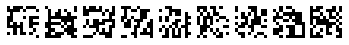

In [8]:
# Generate white noise samples

alphabet_len = 9
im_size = (10, 10)
np.random.seed(42)

white_noise_dataset = np.random.randint(0, 2, 
                                        size=(alphabet_len, im_size[0] * im_size[1]), 
                                        dtype='int') * 2 - 1

for i in range(alphabet_len):
    ax = plt.subplot(1, alphabet_len, i + 1)
    uti.show_letter(white_noise_dataset[i], ax)


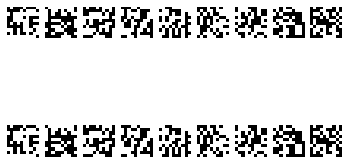

In [9]:
hop_net = hopfield.HopfieldNetwork()
pm = hop_net.run(white_noise_dataset, iterations=1000, lr="hebbian",af="async_tanh")
# print(pm)

  0%|          | 0/99 [00:17<?, ?it/s]


KeyboardInterrupt: 

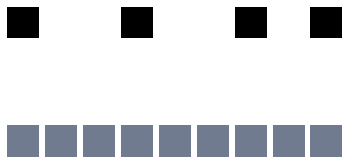

In [10]:
from tqdm import tqdm

hop_net = hopfield.HopfieldNetwork()

net_N = 100
img_N = 20

network_size_range = range(1, net_N)
alphabet_size_range = range(1, img_N)
PMs = [[] for x in network_size_range]

for N, size in enumerate(tqdm(network_size_range)):
    for alph_len in alphabet_size_range:
        # dataset
        white_noise_dataset = np.random.randint(0, 2, size=(alph_len, size), dtype='int') * 2 - 1
        
        # get data
        PMs[N].append(hop_net.run(white_noise_dataset, iterations=1000, lr="hebbian",af="async_tanh"))




In [ ]:
print(PMs.shape)

AttributeError: 'list' object has no attribute 'shape'